# 대규모 숫자 필기 데이터 셋, MNIST

- 60,000개의 학습을 위한 이미지와 10,000개의 테스트를 이미지가 포함(손글씨)


In [12]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from itertools import islice
from torch.autograd import Variable

In [13]:
input_size = 784        # 이미지 사이즈 = (너비: 28, 높이: 28) -> 28 * 28 = 784 픽셀 해상도
hidden_size = 500       # 은닉 레이어 숫자
num_classes = 10        # 숫자 0 ~ 9까지 총 10가지 종류의 클래스 선별 태스크
num_epochs = 20         # 학습에 사용할 세대 수
batch_size = 100        # 매 학습 사이클의 입력 배치 크기
lr = 1e-3               # 학습에서 사용할 학습 진척도

In [14]:
train_data = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True) # 편향을 제거 하기 위해서 shuffle 을 True 로
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

In [15]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()   # 활성 함수
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [16]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
    net.cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

print(torch.backends.mps.is_available())  # MPS 사용 가능 여부
print(torch.backends.mps.is_built())      # MPS 지원 여부

True
True


In [17]:
# Device 설정: MPS 또는 CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

net = net.to(device)

# [Training]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28)).to(device)
        labels = Variable(labels).to(device)

        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print("Epoch [%d/%d], Step [%d/%d], Loss: %.4f"
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/600], Loss: 0.3706
Epoch [1/20], Step [200/600], Loss: 0.2149
Epoch [1/20], Step [300/600], Loss: 0.2781
Epoch [1/20], Step [400/600], Loss: 0.0960
Epoch [1/20], Step [500/600], Loss: 0.0721
Epoch [1/20], Step [600/600], Loss: 0.1584
Epoch [2/20], Step [100/600], Loss: 0.1128
Epoch [2/20], Step [200/600], Loss: 0.1161
Epoch [2/20], Step [300/600], Loss: 0.2784
Epoch [2/20], Step [400/600], Loss: 0.0787
Epoch [2/20], Step [500/600], Loss: 0.1241
Epoch [2/20], Step [600/600], Loss: 0.0431
Epoch [3/20], Step [100/600], Loss: 0.0951
Epoch [3/20], Step [200/600], Loss: 0.0728
Epoch [3/20], Step [300/600], Loss: 0.0509
Epoch [3/20], Step [400/600], Loss: 0.0275
Epoch [3/20], Step [500/600], Loss: 0.0914
Epoch [3/20], Step [600/600], Loss: 0.0385
Epoch [4/20], Step [100/600], Loss: 0.0318
Epoch [4/20], Step [200/600], Loss: 0.0547
Epoch [4/20], Step [300/600], Loss: 0.0433
Epoch [4/20], Step [400/600], Loss: 0.0991
Epoch [4/20], Step [500/600], Loss: 0.1247
Epoch [4/20

In [18]:
# [Validation]

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28)).to(device)
    labels = labels.to(device)

    output = net(images)
    _, predicted = torch.max(output, 1)
    correct += (predicted == labels).sum()
    total += labels.size(0)
print("Accuracy of the model: %.3f %%" %((100*correct)/(total+1)))

Accuracy of the model: 98.120 %


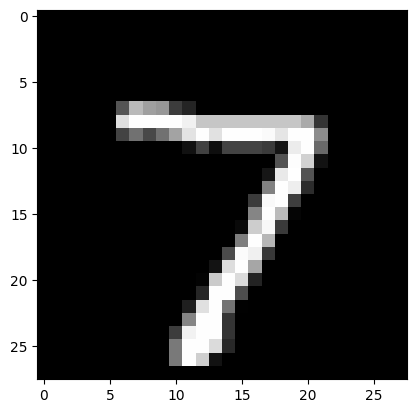

label=tensor(7)
pred=tensor([7], device='mps:0')


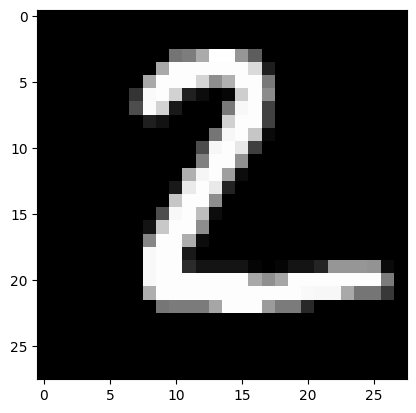

label=tensor(2)
pred=tensor([2], device='mps:0')


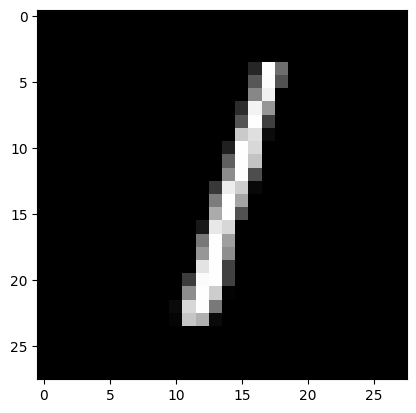

label=tensor(1)
pred=tensor([1], device='mps:0')


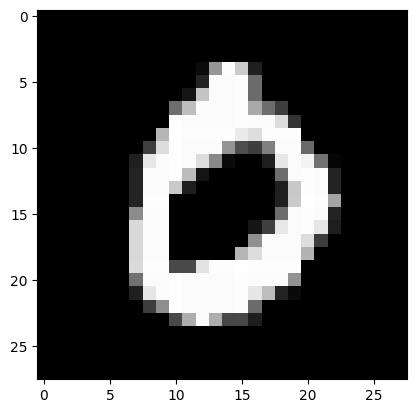

label=tensor(0)
pred=tensor([0], device='mps:0')


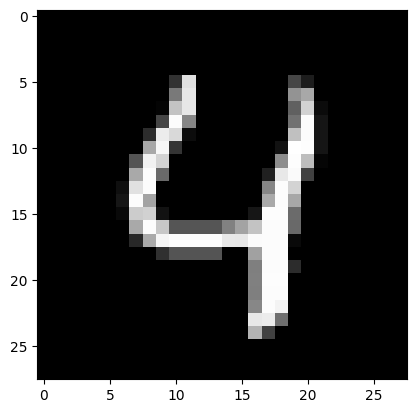

label=tensor(4)
pred=tensor([4], device='mps:0')


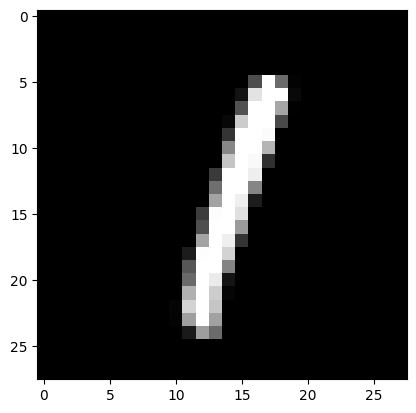

label=tensor(1)
pred=tensor([1], device='mps:0')


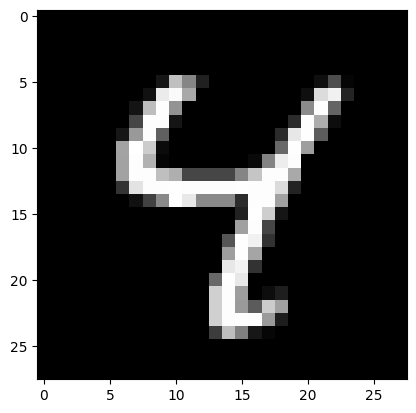

label=tensor(4)
pred=tensor([4], device='mps:0')


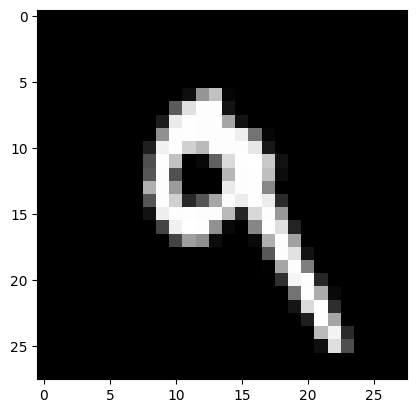

label=tensor(9)
pred=tensor([9], device='mps:0')


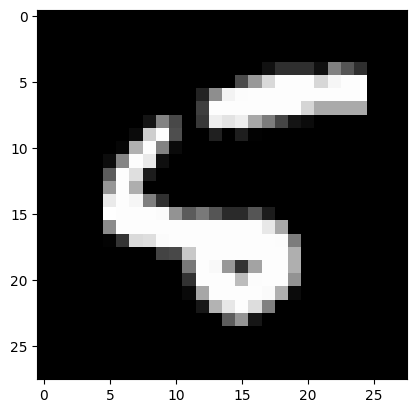

label=tensor(5)
pred=tensor([5], device='mps:0')


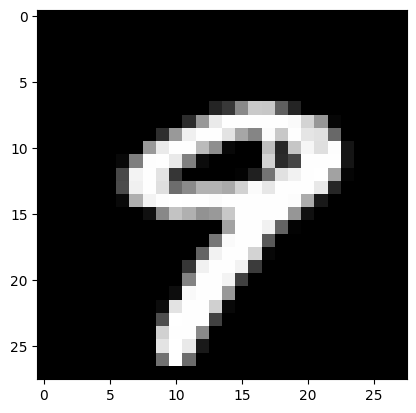

label=tensor(9)
pred=tensor([9], device='mps:0')


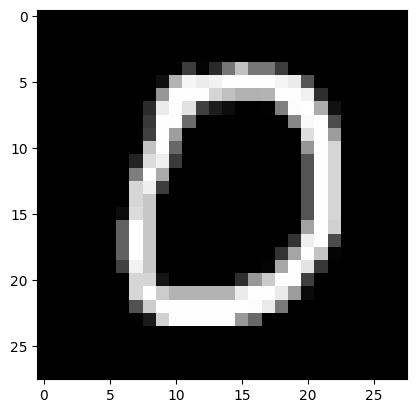

label=tensor(0)
pred=tensor([0], device='mps:0')


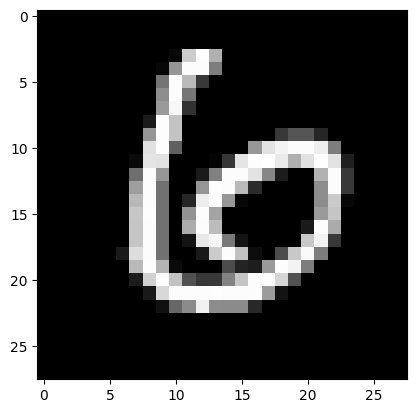

label=tensor(6)
pred=tensor([6], device='mps:0')


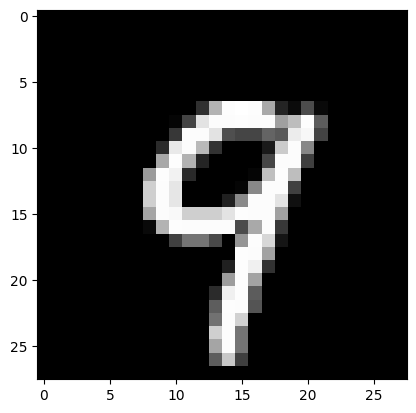

label=tensor(9)
pred=tensor([9], device='mps:0')


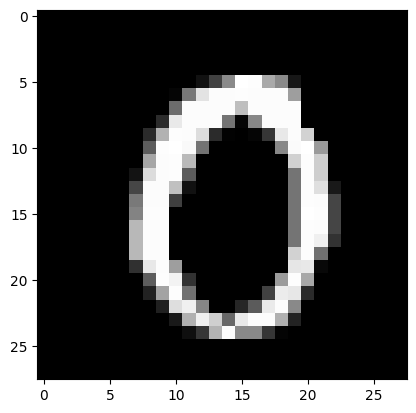

label=tensor(0)
pred=tensor([0], device='mps:0')


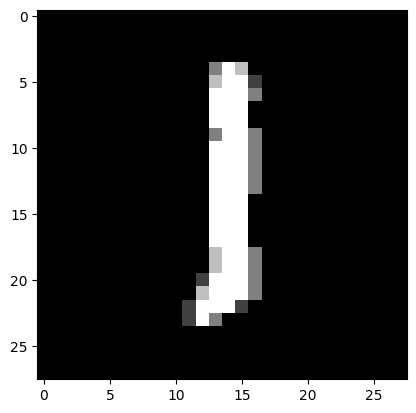

label=tensor(1)
pred=tensor([1], device='mps:0')


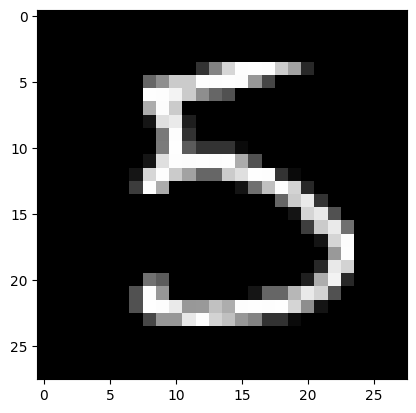

label=tensor(5)
pred=tensor([5], device='mps:0')


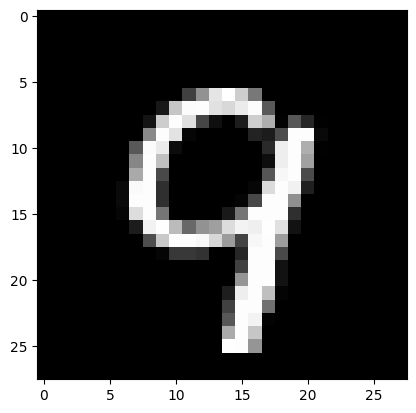

label=tensor(9)
pred=tensor([9], device='mps:0')


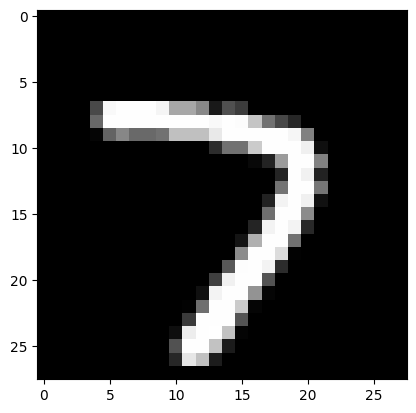

label=tensor(7)
pred=tensor([7], device='mps:0')


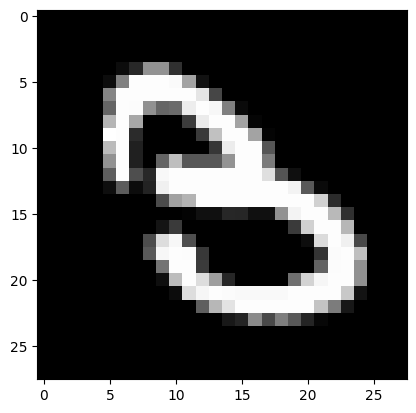

label=tensor(3)
pred=tensor([3], device='mps:0')


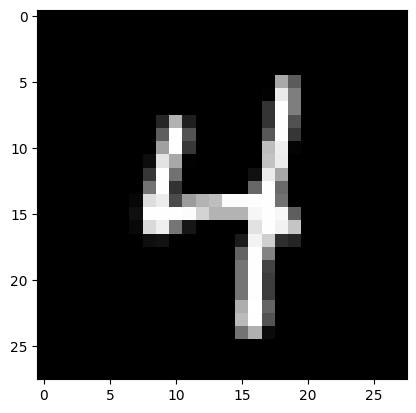

label=tensor(4)
pred=tensor([4], device='mps:0')


In [19]:
images, labels = next(iter(test_loader))
for image, label in islice(zip(images, labels), 20):
    _, pred = torch.max(net(Variable(image.view(-1, 28 * 28).to(device))), 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.show()

    print(f"{label=}")
    print(f"{pred=}")